# Fashion MNIST

In [13]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
X_train = X_train / 255.0

For fashion MNIST, we need the list of class names to know the mapping between number back to class names

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Classification MLP. Neural network model with two hidden layers

In [6]:
# inputs= keras.layers.Input(shape=(28,28))
# layers = keras.layers.Flatten()
# layers = keras.layers.Dense(300, activation="relu")(layers)
# layers = keras.layers.Dense(100, activation="relu")(layers)
# layers = keras.layers.Dense(10, activation="softmax")(layers)
# model = keras.Model(inputs=inputs, outputs=layers)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 90us/sample - loss: 0.7659 - accuracy: 0.7494 - val_loss: 0.5462 - val_accuracy: 0.8066
Epoch 2/30
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4991 - accuracy: 0.8280 - val_loss: 0.5344 - val_accuracy: 0.8046
Epoch 3/30
48000/48000 [==============================] - 4s 76us/sample - loss: 0.4509 - accuracy: 0.8430 - val_loss: 0.4466 - val_accuracy: 0.8432
Epoch 4/30
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4230 - accuracy: 0.8515 - val_loss: 0.4255 - val_accuracy: 0.8484
Epoch 5/30
48000/48000 [==============================] - 4s 77us/sample - loss: 0.4022 - accuracy: 0.8597 - val_loss: 0.3994 - val_accuracy: 0.8601
Epoch 6/30
48000/48000 [==============================] - 4s 77us/sample - loss: 0.3856 - accuracy: 0.8658 - val_loss: 0.3897 - val_accuracy: 0.8638
Epoch 7/30
48000/48000 [==============================] 

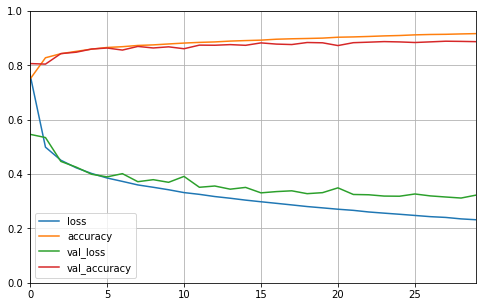

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()